In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/Zehra/Desktop/powerbi/İnsan Kaynakları/AyrılanDatası.xlsx")

In [18]:
df.head(5)

,Job,Joining Quarter,Location,Gender,Education,Age,<6 months,Personel_ID
0,MM,Q3,ISTANBUL,Male,High School,20-30,NO,1
1,SG,Q4,ISTANBUL,Male,Elementary,20-30,NO,2
2,SG,Q2,ISTANBUL,Male,Elementary,20-30,NO,3
3,SG,Q2,ISTANBUL,Female,Elementary,20-30,NO,4
4,SG,Q3,ISTANBUL,Male,Elementary,<20,NO,5


In [20]:
df=df.rename(columns = {'Joining Quarter':'Joining_Quarter'})
df=df.rename(columns = {'<6 months':'6_months'})

In [57]:
df.shape

(2025, 8)

In [22]:
df["Gender"] = df["Gender"].replace("Male", 1)
df["Gender"] = df["Gender"].replace("Female", 2)

In [30]:
df["6_months"] = df["6_months"].replace("YES", 1)
df["6_months"] = df["6_months"].replace("NO", 2)

In [24]:
df["Joining_Quarter"] = df["Joining_Quarter"].replace("Q1", 1)
df["Joining_Quarter"] = df["Joining_Quarter"].replace("Q2", 2)
df["Joining_Quarter"] = df["Joining_Quarter"].replace("Q3", 1)
df["Joining_Quarter"] = df["Joining_Quarter"].replace("Q4", 2)

In [25]:
df["Job"] = df["Job"].replace("MM", 1)
df["Job"] = df["Job"].replace("SG", 2)
df["Job"] = df["Job"].replace("GD", 3)
df["Job"] = df["Job"].replace("PART-SG", 4)
df["Job"] = df["Job"].replace("MMY", 5)
df["Job"] = df["Job"].replace("SUP", 6)

In [26]:
df["Location"] = df["Location"].replace("ISTANBUL", 1)
df["Location"] = df["Location"].replace("Others", 2)

In [27]:
df["Education"] = df["Education"].replace("2-Year University", 1)
df["Education"] = df["Education"].replace("4-Year University", 2)
df["Education"] = df["Education"].replace("Elementary", 3)
df["Education"] = df["Education"].replace("High School", 4)

In [28]:
df["Age"] = df["Age"].replace("<20", 1)
df["Age"] = df["Age"].replace("20-30", 2)
df["Age"] = df["Age"].replace("30-40", 3)
df["Age"] = df["Age"].replace(">40", 4)

In [31]:
df.head()

,Job,Joining_Quarter,Location,Gender,Education,Age,6_months,Personel_ID
0,1,1,1,1,4,2,2,1
1,2,2,1,1,3,2,2,2
2,2,2,1,1,3,2,2,3
3,2,2,1,2,3,2,2,4
4,2,1,1,1,3,1,2,5


In [32]:
df.isnull().any().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job              2025 non-null   object
 1   Joining Quarter  2025 non-null   object
 2   Location         2025 non-null   object
 3   Gender           2025 non-null   object
 4   Education        2025 non-null   object
 5   Age              2025 non-null   object
 6   <6 months        2025 non-null   object
 7   Personel_ID      2025 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 126.7+ KB


In [6]:
df.shape

(2025, 8)

In [7]:
kat_df = df.select_dtypes(include = "object")

In [8]:
kat_df["Education"].value_counts()

High School          1258
2-Year University     392
4-Year University     284
Elementary             91
Name: Education, dtype: int64

<AxesSubplot:>

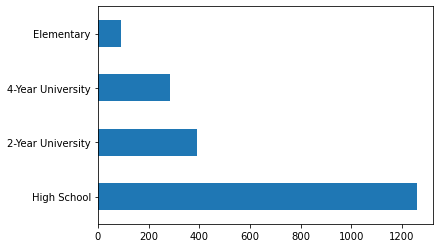

In [9]:
df["Education"].value_counts().plot.barh()

In [10]:
from pandas.api.types import CategoricalDtype

In [11]:
df.Education = df.Education.astype(CategoricalDtype(ordered = True))

In [12]:
Education_kategoriler =["Elementary", "High School", "2-Year University", "4-Year University"]

In [13]:
df.Education = df.Education.astype(CategoricalDtype(categories = Education_kategoriler, ordered = True))

In [14]:
df.Education.head(1)

0    High School
Name: Education, dtype: category
Categories (4, object): ['Elementary' < 'High School' < '2-Year University' < '4-Year University']

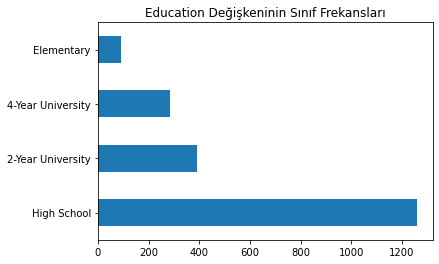

In [15]:
(df["Education"]
 .value_counts()
 .plot.barh()
 .set_title("Education Değişkeninin Sınıf Frekansları"));

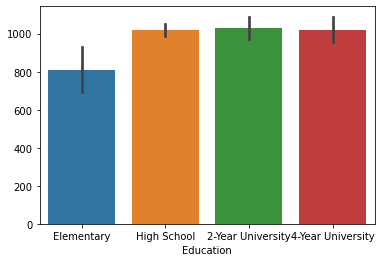

In [16]:
sns.barplot(x = "Education", y = df.Education.index, data =df);

In [74]:
df = df.drop("Personel_ID", axis=1)

In [34]:
df.head(2)

,Job,Joining_Quarter,Location,Gender,Education,Age,6_months,Personel_ID
0,1,1,1,1,4,2,2,1
1,2,2,1,1,3,2,2,2


In [40]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [76]:
y = df["6_months"]
x = df.drop("6_months", axis=1)

In [77]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30,random_state=100)

In [78]:
lg_model=LogisticRegression(max_iter=1000)

In [79]:
#modeli eğitme
lg_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [80]:
lg_model.score(x_test,y_test)

0.555921052631579

In [81]:
lg_model.score(x_train,y_train)

0.5998588567395907

In [82]:
lg_model=LogisticRegression(C=0.1, max_iter=1000)
lg_model.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [70]:
print(lg_model.score(x_test,y_test))
print(lg_model.score(x_train,y_train))

0.5608552631578947
0.6012702893436839


In [84]:
df.head()

,Job,Joining_Quarter,Location,Gender,Education,Age,6_months
0,1,1,1,1,4,2,2
1,2,2,1,1,3,2,2
2,2,2,1,1,3,2,2
3,2,2,1,2,3,2,2
4,2,1,1,1,3,1,2


In [83]:
tahmin = lg_model.predict(x_test)
confusion_matrix(y_test,tahmin)

array([[ 29, 219],
       [ 48, 312]], dtype=int64)

In [87]:
#deneme
yeni_veri=np.array([[1,1,1,1,4,2]])

In [88]:
lg_model.predict(yeni_veri)

array([1], dtype=int64)